# Data Input and Descriptive Analysis

In the realm of data science, the acquisition of data is a pivotal initial step. Data comes in various forms, including downloadable files such as CSV, TXT, Excel, JSON, and is accessible through APIs and databases. 

This project focuses on demonstrating proficiency in handling two of the most prevalent downloadable data formats: **comma-separated-values (CSV)** and **Excel (XLS)** files. Given the inherent spatial nature of urban analytics, we will also delve into the manipulation of **JSON** files, which are commonly employed for spatial data representation.



The project encompasses fundamental descriptive analytics techniques, serving the purpose of data exploration.

Key Objectives:

* Proficiency in working with CSV, TXT, and Excel data formats.
* Handling spatial data using JSON.
* Implementation of basic descriptive analytics.
* Attaining insights through record counting, time frame definition, and numerical summation.

Engaging in descriptive analysis at this stage is not only advisable but indispensable. It provides crucial insights into the data's scale, utility, and potential issues, thereby laying the groundwork for subsequent in-depth analysis.

In [2]:
import pandas as pd #first we'll need module pandas to work with the dataframes
%matplotlib inline
import numpy as np

## Example 1. The 311 service requests (CSV) in Boston

The data contains all 311 call service requests, including their time, location, type of issue and many other details

Source https://data.boston.gov/dataset/311-service-requests

In [13]:
#lets specify the file location on the web
#we can actually upload the data directly from there!
#the data is provided by year, so consider the most recent full year available - 2019
fname = '311_service_requests_2020.csv'
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpxbo51van.csv'

In [14]:
boston311 = pd.read_csv(url) #upload the data

In [22]:
#preview the data, boston311 is object. it's like calling head from pandas, and giving boston311 as argument. 
#head function shows us the first 5 rows of the data frame. 
boston311.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101003148265,2020-01-01 00:07:00,2020-01-13 03:30:00,2020-01-20 06:43:10,OVERDUE,Closed,Case Closed. Closed date : 2020-01-20 11:43:10...,Park Lights - Doherty Playground (BPRD),Parks & Recreation Department,Park Maintenance & Safety,...,Charlestown,2,2,0207,INTERSECTION S Quincy Pl & Saint Martin St,NaN,42.382987,-71.067828,0101000020E6100000ADA5774957C451C01A77A6B30531...,Citizens Connect App
1,101003148266,2020-01-01 00:54:48,2020-01-01 00:54:48,2020-01-02 01:11:49,OVERDUE,Closed,Case Closed. Closed date : 2020-01-02 06:11:49...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,8,Ward 17,1702,85 Bloomfield St,2124.0,42.298900,-71.069541,0101000020E6100000E9E56F5A73C451C07E7212574226...,Citizens Connect App
2,101003148268,2020-01-01 01:14:13,2020-01-03 03:30:00,2020-01-01 10:05:46,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 15:05:46...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,South End,6,Ward 9,0901,423 Shawmut Ave,2118.0,42.340130,-71.074291,0101000020E6100000E2300A2DC1C451C0AAFE665D892B...,Citizens Connect App
3,101003148269,2020-01-01 01:19:00,2020-01-03 03:30:00,2020-01-02 01:10:56,ONTIME,Closed,Case Closed. Closed date : 2020-01-02 06:10:56...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Roxbury,13,Ward 12,1201,6 Moreland St,2119.0,42.325960,-71.082761,0101000020E61000006A0602F34BC551C0EB78EE0AB929...,Constituent Call
4,101003148271,2020-01-01 02:02:00,2020-01-03 03:30:00,2020-01-01 02:07:17,ONTIME,Closed,Case Closed. Closed date : 2020-01-01 07:07:17...,Missed Trash: District 1B,Public Works Department,Sanitation,...,Beacon Hill,14,Ward 5,0503,25-29 Charles St,2114.0,42.356920,-71.069650,0101000020E61000001AD6442775C451C0A731108AAF2D...,Constituent Call


In [23]:
#get the list of columns
#head doesnt give show you all the columns. notice there is '...' So it's a good idea to check all the columns.
boston311.columns #provides you to list of columns.

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')

In [24]:
#you can convert it to simple list too;

list(boston311.columns)

['case_enquiry_id',
 'open_dt',
 'sla_target_dt',
 'closed_dt',
 'on_time',
 'case_status',
 'closure_reason',
 'case_title',
 'subject',
 'reason',
 'type',
 'queue',
 'department',
 'submitted_photo',
 'closed_photo',
 'location',
 'fire_district',
 'pwd_district',
 'city_council_district',
 'police_district',
 'neighborhood',
 'neighborhood_services_district',
 'ward',
 'precinct',
 'location_street_name',
 'location_zipcode',
 'latitude',
 'longitude',
 'geom_4326',
 'source']

In [25]:
#get the total number of records
len(boston311)

251222

In [26]:
#summary statistics for all the numeric columns
#.describe decribes the basic statistic of the data. 
boston311.describe()

,case_enquiry_id,location_zipcode,latitude,longitude
count,2.512220e+05,196540.000000,249132.000000,249132.000000
mean,1.010034e+11,2126.905887,42.324363,-71.081205
std,1.221636e+05,17.836674,0.455815,0.455745
min,1.010031e+11,2108.000000,-71.135810,-71.190497
25%,1.010033e+11,2119.000000,42.299046,-71.105288
50%,1.010034e+11,2126.000000,42.333261,-71.075641
75%,1.010035e+11,2130.000000,42.350642,-71.058860
max,1.010038e+11,2467.000000,42.398393,42.358474


Why do we need decriptive analysis? Well, why do you need desc. statistics in general? Because, main reason

  * what the data is?

  * how useful the data is? (in the context of your ressearch question) {to assess the utility of the data}

  * assess the possible limitations of your data

What do we understand from this so far:

* Provides a clear indication of the count of records with valid number assignments, along with calculations of average values and latitude/longitude ranges.

* statistics for Zipcode and ID won't make that much sense

* as while these data has numeric type its categorical in nature and computing averages is somewhat meaningless

* Some additional descriptive analysis one might be interested is to learn more about the categorical variables, e.g. subject, reason, type, neighborhood, zip_code

So 'decribe' gives some statistics for numeric data. Let's look categorical data. (in this case, like "subject", "reason", for ex: textual columns.

In [19]:
#first let's get the list of unique values for each, or at least the number of such values

In [20]:
boston311.subject.unique()

array(['Parks & Recreation Department',
       'Transportation - Traffic Division', 'Public Works Department',
       "Mayor's 24 Hour Hotline", 'Inspectional Services',
       'Property Management', 'Animal Control',
       'Boston Water & Sewer Commission', 'Boston Police Department',
       'Consumer Affairs & Licensing', 'Neighborhood Services'],
      dtype=object)

In [21]:
len(boston311.subject.unique())

11

In [33]:
len(boston311.reason.unique())

45

In [34]:
len(boston311.type.unique())

175

And if e.g. we want to know the number of complaints per subject we can group the dataframe as following

In [36]:
boston311['subject'].value_counts() #it gives you the number of complaints per each subject
# so we grouped complaints by subject

Public Works Department              131098
Transportation - Traffic Division     54561
Inspectional Services                 21363
Mayor's 24 Hour Hotline               18248
Parks & Recreation Department         17355
Property Management                    3487
Animal Control                         3239
Boston Water & Sewer Commission        1220
Boston Police Department                589
Neighborhood Services                    36
Consumer Affairs & Licensing             26
Name: subject, dtype: int64

In [37]:
len(boston311.neighborhood.unique())

25

<AxesSubplot:xlabel='subject'>

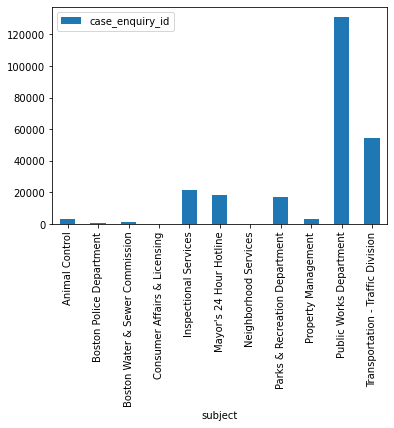

In [42]:
#let's plot number of complaints by subject
#or visualizing as a histogram
boston311[['subject','case_enquiry_id']].groupby(by=['subject']).count().plot.bar()

### Let's count the number of neighborhoods and visualize the number of complaints by neighborhood

In [41]:
#find unique neighboorhoods
boston311.neighborhood.unique()

array(['Charlestown', 'Dorchester', 'South End', 'Roxbury', 'Beacon Hill',
       'South Boston / South Boston Waterfront', 'Jamaica Plain',
       'Mission Hill', 'Downtown / Financial District', 'Roslindale',
       'Greater Mattapan', 'East Boston', 'West Roxbury', 'Hyde Park',
       'Back Bay', 'Allston / Brighton', 'Allston', ' ', 'Boston',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'South Boston',
       'Brighton', 'Mattapan', nan, 'Chestnut Hill'], dtype=object)

In [48]:
print('the number of unique neighborhoods is', len(boston311.neighborhood.unique()))

the number of unique neighborhoods is 25


In [44]:
#or we can make this as a function:

def counting_neigh(df):
    neigh_count = len(df.neighborhood.unique())
    print('the number of unique neighborhoods is', neigh_count)   

In [49]:
counting_neigh(boston311)

the number of unique neighborhoods is 25


In [50]:
boston311['neighborhood'].value_counts()

Dorchester                                      38680
Roxbury                                         23813
South Boston / South Boston Waterfront          19966
Allston / Brighton                              17744
East Boston                                     16679
South End                                       16674
Jamaica Plain                                   13609
Hyde Park                                       13024
Downtown / Financial District                   12569
Greater Mattapan                                11093
Back Bay                                        11082
Charlestown                                      9314
West Roxbury                                     8984
Roslindale                                       8860
Boston                                           7218
Beacon Hill                                      5518
Fenway / Kenmore / Audubon Circle / Longwood     4367
Mission Hill                                     4158
                            

<AxesSubplot:xlabel='neighborhood'>

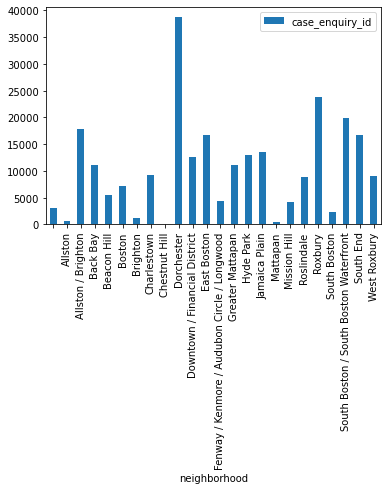

In [52]:
#Visualize the number of complaints by neighborhood

boston311[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().plot.bar()

## Example 2. Real-estate data sales (XLS)

The data contains information on all the residential real estate sold in NYC, including address of the house/unit, its size, age, time of sale and of course the price


In [53]:
#the data is split by year and borough. Take Brooklyn in 2015 
year=2015; boro='brooklyn'

In [54]:
fname=str(year)+'_'+boro+'.xls'

In [55]:
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname

In [57]:
re_sales = pd.read_excel(url)

In [60]:
#as we see below, we read as xls file, and not very pandas friendly.
re_sales.head()

,"BROOKLYN ANNUALIZE SALE FOR 2015. (All Sales From January 1, 2015 - December 31, 2015)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 3/31/2016. Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name 4/1/16. Descriptive Data as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31 00:00:00


We'll need to skip first 4 lines to make it pandas-friendly. or: 

And also consider alternative data ingestion approach: download to the local folder first and then upload from local drive

In [62]:
import urllib #use urllib mobule for web requests
dataDir='' #local data folder to use
urllib.request.urlretrieve(url,dataDir+fname)


#for now, skipping works. But, let's say, if your data isnt opening, you need to download the data then!

('2015_brooklyn.xls', <http.client.HTTPMessage at 0x7fc21ba27a30>)

In [63]:
#now upload the data, also skipping first 4 rows
re_sales = pd.read_excel(dataDir+fname,skiprows=4)

In [64]:
re_sales.head() #now the dataframe looks reasonable

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [65]:
re_sales.columns #list of the columns to assess the metadata

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

**notice that field names contain an artifact from the original data represenation - end of line symbol '\n'
this way we won't be able to access the fields as before using "." syntax, but we can still use "[ ]" syntax like**


In [66]:
#should give an error, not conventional name. so you need to go with "BOROUGH\n" like below code.
re_sales.BOROUGH 

AttributeError: 'DataFrame' object has no attribute 'BOROUGH'

In [67]:
re_sales['SALE PRICE\n'].sum() #this will be the total sales volume


19990077327

In [68]:
re_sales.describe() #statistics for numeric columns

,BOROUGH\n,BLOCK\n,LOT\n,ZIP CODE\n,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,SALE PRICE\n
count,25362.0,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,25362.000000,2.536200e+04
mean,3.0,4207.714534,281.084418,11217.017270,2.376981,0.185474,2.603817,2238.399456,2878.065649,1774.995584,1.699077,7.881901e+05
std,0.0,2649.487442,492.384071,186.770716,7.803233,2.711002,8.286863,6372.188724,10178.063689,542.988555,0.944152,3.198035e+06
min,3.0,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,3.0,1768.000000,21.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1910.000000,1.000000,0.000000e+00
50%,3.0,4149.000000,46.000000,11219.000000,1.000000,0.000000,1.000000,1900.000000,1744.500000,1929.000000,1.000000,3.300000e+05
75%,3.0,6540.000000,103.000000,11231.000000,2.000000,0.000000,2.000000,2500.000000,2880.000000,1957.000000,2.000000,8.130000e+05
max,3.0,8955.000000,9033.000000,11249.000000,338.000000,355.000000,355.000000,293000.000000,366000.000000,2016.000000,4.000000,1.690000e+08


It also helps us spot some issues with the data - zero min's for zip code, size, year (also average age of 1774 does not look right and is likely affected by that), sale price show that some records are unreliable

* "0" year, missing year obviously or zip code/or price is 0 dollars for a house?
* or check avg year built in. '1774'. Is brooklyn really that old? Obviously not. Reason: you may have many houses listed which the year is not undefined. And when you get average, year looks old. So you need to exclude 0s.
* Also, you have 0 in your min price. You need to exlude them.


Descriptive analysis tells you what to do and how to prepare your data before actually do analysis and getting some meaningful results.

Also lets introduce some descriptive analysis, e.g. total price and average price per unit

In [69]:
re_sales['SALE PRICE\n'].mean() #average price per unit

788190.100425834

In [70]:
#However, you cannot trust the mean above, you still have 0 prices in your data. 
#So, exclude them to get the real number. However, even this may not the real number, 
#there still might be stupidly high and low enteries

re_sales['SALE PRICE\n'][re_sales['SALE PRICE\n']>0].mean()

1236091.8455973286

In [71]:
#or visualizing an average sale price per zip code 
#ideally this would make more sense as a spatial visualization on the map. but let us get to that later
#we'll use groupby here. Note that groupby will apply mean to all the fields other than the ones used for grouping (by)
#so we first filter the dataframe to keep only two columns - 'ZIP CODE\n','SALE PRICE\n' - first for grouping, second for taking averages
re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean()

#the first part of code: from re_sales, only keep zip code and sale price
#second part: groupby according to zip code, and take the mean of everyhing other than zip code. 

,SALE PRICE\n
ZIP CODE,
0,4.892857e+05
11201,1.618065e+06
11203,4.190376e+05
11204,4.908219e+05
11205,7.062129e+05
11206,1.213060e+06
11207,4.006299e+05
11208,3.979557e+05
11209,5.333751e+05


<AxesSubplot:xlabel='ZIP CODE\n'>

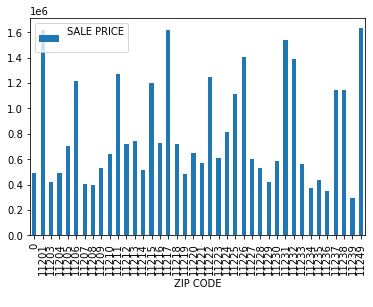

In [72]:
#let's show it on bar plot

re_sales[['ZIP CODE\n','SALE PRICE\n']].groupby(by=['ZIP CODE\n']).mean().plot.bar()

Note: it's not the best way to visualize this type geo data, 'heat map' would be better representation for this. but we dont have shapefile for this, so we use histogram.

But price per unit is not always the best characteristics of the market as units might be quite different, ranging from small studios to large houses. Besides particularly expensive ones may affect the averages. Median price is often used along with the price per square foot. In the next excercise, we'll try to compute an average price per square foot. For now let's skip the technical issue like missing/zero data and just plow ahead. In the next lab we'll talk about how those should addressed.

### Let's quantify the average price per square foot per zip code and visualize result as a bar plot. Let's find which zip codes are the three most expensive ones.

In [77]:
#First, use "group_by" to create an aggregate with cumulative price and sq foot size 
#and then add a new field through assignment dividing one by the other.

In [78]:
#calculating cumulative sale price, omitting the results where ZIP CODE =0
totalprice=re_sales[['SALE PRICE\n','ZIP CODE\n']][re_sales['ZIP CODE\n']>0].groupby(by=['ZIP CODE\n']).sum()
totalprice.head()

,SALE PRICE\n
ZIP CODE,
11201,1986984263
11203,271955412
11204,318543428
11205,538840478
11206,657478647


In [98]:
#calculating cumulative square foot, omitting the results where ZIP CODE and GROSS SQUARE FEET =0
totalsqft = re_sales[['GROSS SQUARE FEET\n', 'ZIP CODE\n']][(re_sales['GROSS SQUARE FEET\n'] > 0) & (re_sales['ZIP CODE\n'] > 0)].groupby(by=['ZIP CODE\n']).sum()

totalsqft.head()

,GROSS SQUARE FEET\n
ZIP CODE,
11201,2634291
11203,1763658
11204,1468675
11205,2532107
11206,1905171


In [100]:
totalsqft.tail()

,GROSS SQUARE FEET\n
ZIP CODE,
11235,2113837
11236,1880580
11237,1829927
11238,2606097
11249,1100543


In [101]:
#Quantifying the average price per square foot per zip code. 

new_mean = totalprice['SALE PRICE\n']/totalsqft['GROSS SQUARE FEET\n']
new_mean.head()

ZIP CODE\n
11201    754.276677
11203    154.199631
11204    216.891707
11205    212.803202
11206    345.102170
dtype: float64

In [102]:
#dropping the NaN value and Visualize result as a bar plot. 
#This is the average price per square foot for each zip code. 
new_mean2=new_mean.dropna() 
new_mean2.head()

ZIP CODE\n
11201    754.276677
11203    154.199631
11204    216.891707
11205    212.803202
11206    345.102170
dtype: float64

<AxesSubplot:xlabel='ZIP CODE\n'>

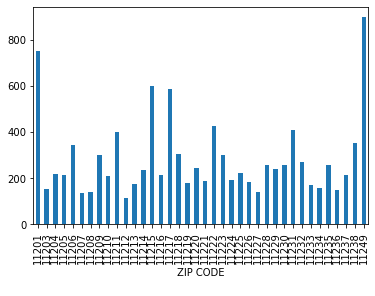

In [103]:
new_mean2.plot.bar()

In [104]:
#sorting the values and finding the most expensive top three
price_sorted=new_mean2.sort_values(ascending=False)
price_sorted.head()

ZIP CODE\n
11249    898.722552
11201    754.276677
11215    599.838428
11217    586.609572
11222    425.013330
dtype: float64

In [107]:
# Get the top three most expensive ZIP codes
top_three_zipcodes = price_sorted.head(3)

# Print the result
print("The top three most expensive house prices per square foot are:")
for zipcode, price in top_three_zipcodes.iteritems():
    print(f"{zipcode}: {price:.2f}")


The top three most expensive house prices per square foot are:
11249: 898.72
11201: 754.28
11215: 599.84


In [110]:
#Better printing:
    
# Get the top three most expensive ZIP codes
top_three_zipcodes = price_sorted.head(3)

# Print the result as a comma-separated list
top_three_zipcodes_str = ', '.join(top_three_zipcodes.index.astype(str))
print(f"The top three most expensive house prices per square foot are: {top_three_zipcodes_str}.")


The top three most expensive house prices per square foot are: 11249, 11201, 11215.


## Example 3. Street Pavement Rating

The New York City Department of Transportation is responsible for keeping the City's streets in good repair. The Agency performs ongoing assessment of New York City streets. Ratings are based on a scale from 1 to 10, and results are grouped in the following categories: Good (%) - ratings of 8 to 10, Fair (%) - ratings of 4 to 7, and Poor (%) - ratings of 1 to 3. Rating dates started from 1994 to 2019. This data will allow you to create a map.


**GeoJSON** is a JSON based format designed to represent the geographical features with their non-spatial attributes. Besides GeoJSON, shapefile is also a common format for geographical datasets. For more information, please check https://geojson.org/.

As **JSON** contains spatial information (in this case shapes of the streets) along with the data, we'll need a slightly different vehicle to load it. There is a module geopandas which we'll use below. In short its just like pandas, but having a special column "geometry" which is meant to contain spatial info

In [111]:
import geopandas as gpd
url = 'https://data.cityofnewyork.us/api/geospatial/2cav-chmn?method=export&format=GeoJSON'
# alternative URL
url = 'https://github.com/CUSP2020PUI/Data/raw/master/Street%20Pavement%20Rating.geojson'
rating = gpd.read_file(url)


In [112]:
rating.shape #shape of the dataframe - first is the number of records (streets)

(81209, 13)

In [113]:
rating.head() #lets preview the data
#it looks similar to pandas, only has speacial data frame(geometry) which stands for the geometry of the streets.
# geometry is array of lati- long or eastern/northern locations.

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date,geometry
0,0,0,56,249.903981561,0,0,None,0,414,30,NR,None,"MULTILINESTRING ((-74.24916 40.49872, -74.2500..."
1,0,0,58,260.837113924,0,0,None,0,425,30,NR,None,"MULTILINESTRING ((-74.24935 40.49944, -74.2502..."
2,0,0,73,250.888421415,0,6,None,2019,202,30,FAIR,2019-03-12T00:00:00+00:00,"MULTILINESTRING ((-74.25058 40.50588, -74.2514..."
3,0,0,106,231.814581077,0,9,None,2019,232,30,GOOD,2019-03-12T00:00:00+00:00,"MULTILINESTRING ((-74.25140 40.51174, -74.2520..."
4,0,0,123,276.441675585,0,8,None,2013,212,30,GOOD,2013-06-19T00:00:00+00:00,"MULTILINESTRING ((-74.25171 40.51409, -74.2511..."


In [114]:
rating.iloc[:,:-1].describe() #note that we can't apply describe to a geometry column so need to exclude it first
#it doesnt know how to deal with geometry so it breaks. Exclude geometry first! then descriptive stat.
#Series.iloc[]> integer-location based indexing for selection by position. 
#it says select everything until last column.

,hagstrom,bus,segment_id,shape_leng,truck,rating_b,usage_class,rating_fy_s,length,width,rating_word,rating_date
count,81209,81209,81209,81209,81209,81209,57698,81209,81209,81209,81209,72989
unique,2,2,81209,41590,2,11,3,30,1588,834,4,1914
top,0,0,29564,260.499520153,0,8,L,2020,246,30,GOOD,2019-11-25T00:00:00+00:00
freq,71660,68374,1,359,73352,25137,40816,33748,846,26402,47178,484


Notice that this time describe look differently. 

This is because the values in the dataframe are not treated as numbers but categorical values. 

meaning: there is no general statistics like other (mean,max,min etc.)

In [115]:
#if we want them as numbers we need to perform type convertion
#meaning: length in the original is categorical, if you want to find statistics, convert it to intergers!
rating['length'] = rating['length'].astype(int) #length's integer'a cevirdik.
rating['length'].describe() # we found the desc. statistics of length of streets

count    81209.000000
mean       382.526321
std        250.159451
min          6.000000
25%        238.000000
50%        288.000000
75%        505.000000
max       6795.000000
Name: length, dtype: float64

In [116]:
rating['length'].sum() #cumulative length of the all the streets across the city.

31064580

In [117]:
#now let's count how many streets are in either condition based on 'rating_word'
rating['rating_word'].value_counts()

GOOD    47178
FAIR    24732
NR       8220
POOR     1079
Name: rating_word, dtype: int64

In [118]:
#now let's count the cumulative length of those in either condition based on 'rating_word'
rating[['rating_word','length']].groupby(by=['rating_word']).sum()

#we grouped by rating word and summed up the length.>the length of good quality streets is 18521671.

,length
rating_word,
FAIR,9291301
GOOD,18521671
NR,2824328
POOR,427280


<AxesSubplot:ylabel='length'>

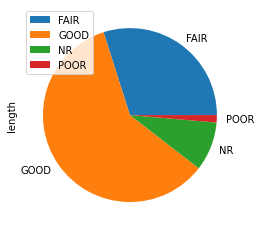

In [119]:
#and visualize overall conditions of the roads using piechart
rating[['rating_word','length']].groupby(by=['rating_word']).sum().plot.pie(y='length')

### And let's use the true power of geopandas - visualize the streetmap

<AxesSubplot:>

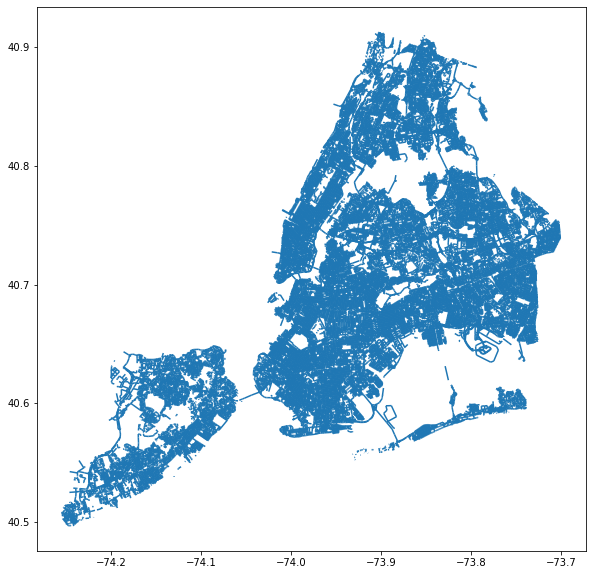

In [121]:
rating.plot(column=None, figsize=(10,10)) #first just the shapes of the streetmap without any information
#you can use 'plot' which is geopandas plot. figure size 10 by 10. 
#no column to use for heat map. Just plotting the streets as they are.

<AxesSubplot:>

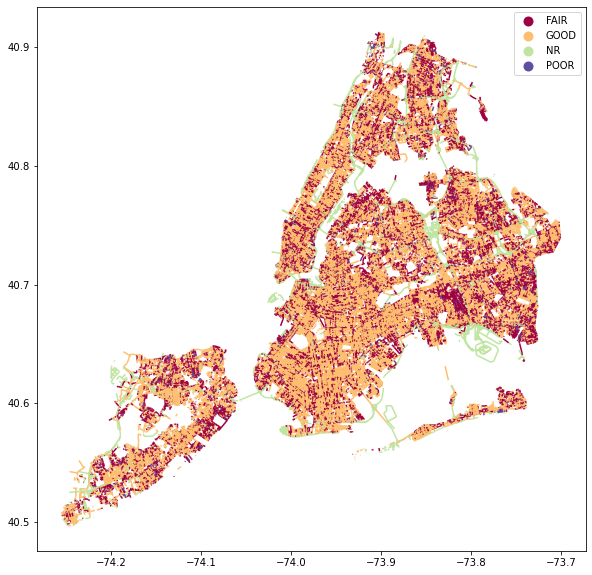

In [122]:
#and now visualize the streets according to their status 
rating.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)

### Let's visualize only the poorly maintained roads so we can zoom into those that need particular attention.

<AxesSubplot:>

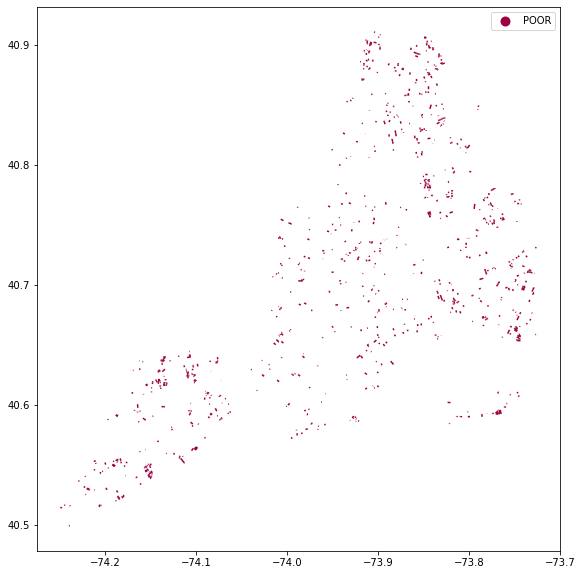

In [131]:
map_poor = rating['rating_word'] == 'POOR'
poormap_df = rating[map_poor]
poormap_df.plot(column='rating_word', cmap='Spectral', figsize=(10, 10), legend=True)


<AxesSubplot:>

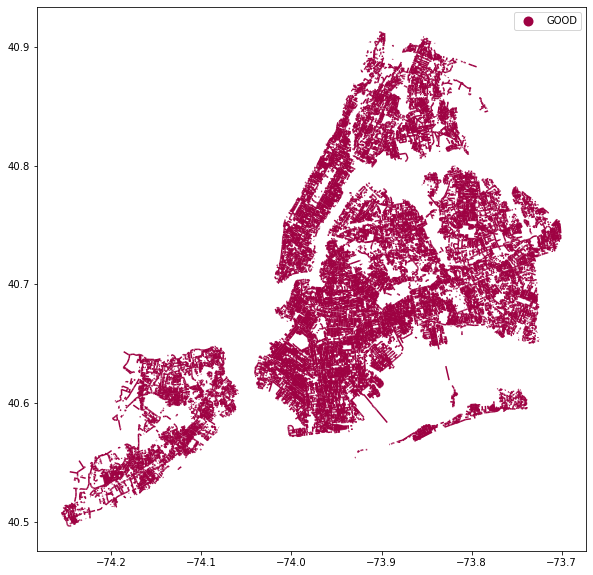

In [129]:
map2=rating['rating_word']=='GOOD'

map3=rating[map2]
map3.plot(column='rating_word',cmap='Spectral',figsize=(10,10),legend=True)


## Example 4: COVID-19 Data by ZIP Code (3 pts)

This dataset includes confirmed case rates, case counts, death rates, death counts, and the percent of people tested with a positive result since March. Follwing download links refer to the dataset uploaded on Sep 1st. Dataset is provided by NYC health, please check https://www1.nyc.gov/site/doh/covid/covid-19-data.page for more information and other COVID19 related datasets.

Let's do following: 
    
    a) Aggregate dataset by Borough, calculate total cases amount in each Borough, and then visualize as a barplot
    
    b) Calculate borough-wise positive case percentage among all the tests administered and 
    
    c) among the borough population (%% of populating tested positive), and then visualize as barplots. 
    
    Notice that both quantities b) and c) matter as otherwise the percentage of people tested positive might depend on the testing availability and practice which are not necessary consistent among boroughs.


In [137]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/7953c97d1e58bbed9934ea04affb12ca74d9c0fb/data-by-modzcta.csv'
# alternative url
url = 'https://raw.githubusercontent.com/CUSP2020PUI/Data/master/COVID19.csv'
df = pd.read_csv(url)

In [138]:
df.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,441,1871.58,23563.03,26,110.34,6.58,6704
1,10002,Chinatown/Lower East Side,Manhattan,1335,1739.29,76755.41,161,209.76,7.73,17276
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,542,1007.40,53801.62,35,65.05,3.56,15204
3,10004,Financial District,Manhattan,40,1095.71,3650.61,1,27.39,4.90,817
4,10005,Financial District,Manhattan,95,1131.48,8396.11,2,23.82,4.55,2090


In [139]:
#calculate total cases amount in each Borough
df[['BOROUGH_GROUP','COVID_CASE_COUNT']].groupby(by=['BOROUGH_GROUP']).sum()

,COVID_CASE_COUNT
BOROUGH_GROUP,
Bronx,50849
Brooklyn,61344
Manhattan,28628
Queens,68148
Staten Island,14886


<AxesSubplot:xlabel='BOROUGH_GROUP'>

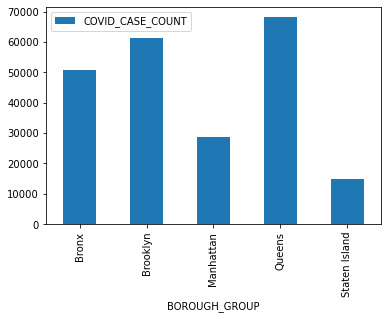

In [140]:
#visualize total cases amount in each Borough as a barplot
df[['BOROUGH_GROUP','COVID_CASE_COUNT']].groupby(by=['BOROUGH_GROUP']).sum().plot.bar()

In [ ]:
total_case=df[['BOROUGH_GROUP','COVID_CASE_COUNT']].groupby(by=['BOROUGH_GROUP']).sum() #the cases in total borough-wise

In [142]:
total_case

,COVID_CASE_COUNT
BOROUGH_GROUP,
Bronx,50849
Brooklyn,61344
Manhattan,28628
Queens,68148
Staten Island,14886


In [144]:
total_test=df[['BOROUGH_GROUP','TOTAL_COVID_TESTS']].groupby(by=['BOROUGH_GROUP']).sum() #total test administered borough-wise
total_test

,TOTAL_COVID_TESTS
BOROUGH_GROUP,
Bronx,352106
Brooklyn,567476
Manhattan,424706
Queens,514959
Staten Island,109487


BOROUGH_GROUP
Bronx            14.441390
Brooklyn         10.809973
Manhattan         6.740663
Queens           13.233675
Staten Island    13.596135
dtype: float64


<AxesSubplot:xlabel='BOROUGH_GROUP'>

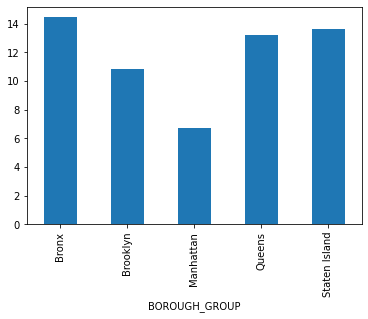

In [145]:
#borough-wise positive case percentage among all the tests administered % visualizing with barplot
poscase_bytest=total_case['COVID_CASE_COUNT']/total_test['TOTAL_COVID_TESTS']*100 
print(poscase_bytest)
poscase_bytest.plot.bar()

In [147]:
#borough-wise positive case percentage among population
population=df[['BOROUGH_GROUP','POP_DENOMINATOR']].groupby(by=['BOROUGH_GROUP']).sum() #population borough-wise
population

,POP_DENOMINATOR
BOROUGH_GROUP,
Bronx,1434692.65
Brooklyn,2582829.99
Manhattan,1611943.49
Queens,2288709.82
Staten Island,476179.01


BOROUGH_GROUP
Bronx            3.544243
Brooklyn         2.375069
Manhattan        1.775993
Queens           2.977573
Staten Island    3.126135
dtype: float64


<AxesSubplot:xlabel='BOROUGH_GROUP'>

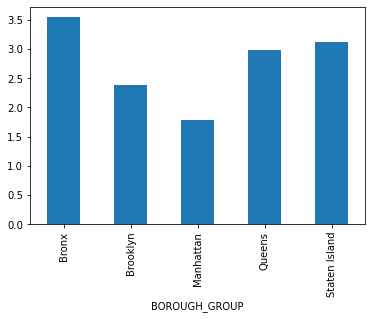

In [148]:
poscase_bypop=total_case['COVID_CASE_COUNT']/population['POP_DENOMINATOR']*100 
print(poscase_bypop)
poscase_bypop.plot.bar()